In [13]:
from selenium import webdriver

driver = webdriver.Firefox()
driver.get("https://www.oldbaileyonline.org/record/t17800628-33")

In [14]:
from bs4 import BeautifulSoup

driver.implicitly_wait(5);
driver.page_source;

soup = BeautifulSoup(driver.page_source, 'html.parser')
 
driver.quit()

In [15]:
p_list = soup.find_all('p')

In [16]:
import string 
from stop_words import get_stop_words
stop_words = set(get_stop_words('english'))

word_list = []

for p in [str(x) for x in p_list]:
    p = p.replace('<p>', '')
    p = p.replace('</p>', '')
    p = p.lower()
    word = ''
    for c in p:
        if c in string.whitespace:
            if len(word) > 0 and word not in stop_words:
                word_list.append(word)
            word = ''
        elif c in string.ascii_lowercase or c in string.digits:
            word+=c


In [17]:
word_freq = {}
for word in word_list:
    if word in word_freq:
        word_freq[word]+=1
    else:
        word_freq[word]=1

In [18]:
dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

{'house': 19,
 'mr': 19,
 'prisoner': 15,
 'man': 14,
 'yes': 13,
 'black': 12,
 'night': 11,
 'akermans': 10,
 'saw': 10,
 'went': 9,
 'mob': 9,
 'know': 9,
 'believe': 7,
 'made': 7,
 'took': 7,
 'see': 7,
 'swear': 7,
 'time': 7,
 'thing': 7,
 'lie': 7,
 'servant': 7,
 '6th': 6,
 'one': 6,
 'came': 6,
 'upon': 6,
 'seemed': 6,
 'fire': 6,
 'room': 6,
 'hat': 6,
 'face': 6,
 'key': 6,
 'lay': 6,
 'june': 5,
 'akerman': 5,
 'door': 5,
 'three': 5,
 'people': 5,
 'person': 5,
 'never': 5,
 'first': 5,
 'second': 5,
 'positive': 5,
 'lodging': 5,
 'prison': 5,
 'persons': 4,
 'evening': 4,
 'better': 4,
 'say': 4,
 'particular': 4,
 'notice': 4,
 'place': 4,
 'amongst': 4,
 'hands': 4,
 'remark': 4,
 'stockings': 4,
 'name': 4,
 'trunk': 4,
 'knew': 4,
 'day': 4,
 'form': 3,
 'opposite': 3,
 'seven': 3,
 'oclock': 3,
 'dressed': 3,
 'rest': 3,
 'times': 3,
 'found': 3,
 'immediately': 3,
 'take': 3,
 'others': 3,
 'men': 3,
 'two': 3,
 'servants': 3,
 'goods': 3,
 'observed': 3,
 'gente

([<matplotlib.axis.XTick at 0x118a11fc0>,
 [Text(0, 0, 'house'),
  Text(1, 0, 'mr'),
  Text(2, 0, 'akermans'),
  Text(3, 0, 'man'),
  Text(4, 0, 'saw'),
  Text(5, 0, 'black'),
  Text(6, 0, 'prisoner'),
  Text(7, 0, 'yes'),
  Text(8, 0, 'night')])

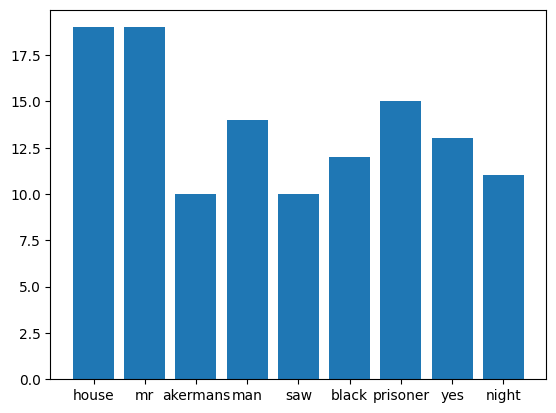

In [19]:
common_words = {k:v for k,v in word_freq.items() if v > 9}

import matplotlib.pyplot as plt

plt.bar(range(len(common_words)), list(common_words.values()), align='center')
plt.xticks(range(len(common_words)), list(common_words.keys()))